# ANLY 590 Assignment 0
## Cheng Zhong
### Sep 18th 2019

# 1. Regularization

## 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 

In [227]:
### import all the packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [217]:
# read data from csv and drop missing values
hitter = pd.read_csv("~/Desktop/Course Documents/ANLY 590/hw0/Hitters.csv").dropna()
hitter.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [218]:
# Check all the data type
hitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [219]:
# remove the categorical values
hitter_numeric = hitter._get_numeric_data().astype(float)
hitter_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
AtBat      263 non-null float64
Hits       263 non-null float64
HmRun      263 non-null float64
Runs       263 non-null float64
RBI        263 non-null float64
Walks      263 non-null float64
Years      263 non-null float64
CAtBat     263 non-null float64
CHits      263 non-null float64
CHmRun     263 non-null float64
CRuns      263 non-null float64
CRBI       263 non-null float64
CWalks     263 non-null float64
PutOuts    263 non-null float64
Assists    263 non-null float64
Errors     263 non-null float64
Salary     263 non-null float64
dtypes: float64(17)
memory usage: 37.0 KB


In [220]:
# Check the new data
hitter_numeric.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0


In [237]:
# set predictors
y = hitter_numeric['Salary']
x = hitter_numeric.drop(['Salary'],axis=1)

### 1.1.1 Create a visualization of the coefficient trajectories

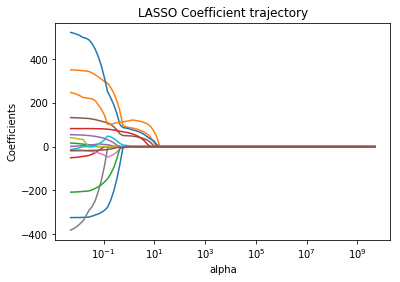

In [238]:
# Set the alpha sequence
myalphas = 10**np.linspace(10,-2,100)*0.5

#Fit the Lasso model for different alphas
lasso = Lasso(max_iter = 10000, normalize=True)
coefs = []

for alpha in myalphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(x), y)
    coefs.append(lasso.coef_)

# plot the coefficient trajectories
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficient trajectory')
plt.show()

### 1.1.2 Comment on which are the final three predictors that remain in the model

In [239]:
lasso.set_params(alpha=11)
lasso.fit(x,y)
pd.Series(lasso.coef_, index=x.columns)

AtBat      0.000000
Hits       0.037439
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.062909
CRBI       0.176160
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

Hence we can see that the final three predictors remain in the model are Hits, CRuns and CRBI.

### 1.1.3 Use cross-validation to find the optimal value of the regularization penalty

In [240]:
# Split data into train set and test set using 30% test size
x_train,x_test,y_train,y_test = cross_validation.train_test_split(x, y,test_size=0.3,random_state = 123)

# Using cross validation to fit the model
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000, normalize=True)
lassocv.fit(x_train, y_train)

# Find the optimal value of regularization penalty
print("The optimal value of regularization penalty is: "+str(lassocv.alpha_))

The optimal value of regularization penalty is: 0.5748784976988678


In [241]:
# Find predictors left in model
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
pd.Series(lasso.coef_, index=x.columns)

AtBat      -0.000000
Hits        0.377930
HmRun      -1.372734
Runs        0.000000
RBI         0.000000
Walks       2.348490
Years     -21.726809
CAtBat      0.000000
CHits       0.000000
CHmRun      0.153057
CRuns       0.657510
CRBI        0.437270
CWalks     -0.000000
PutOuts     0.321255
Assists     0.126297
Errors     -3.525472
dtype: float64

### 1.1.4 How many predictors are left in that model?

As we can see from the above result, ten predictors are left in the model.

## 1.2 Repeat With Ridge Regression

### 1.2.1 Visualize the coefficient trajectories

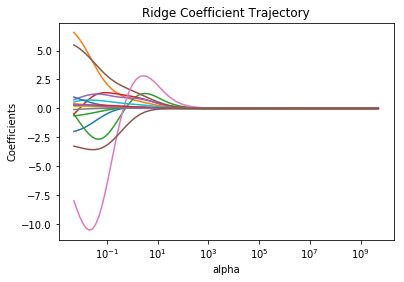

In [242]:
# Fit for Ridge Regression using different alphas
ridge = Ridge(normalize=True)
coefs = []

for alpha in myalphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficient Trajectory')
plt.show()

### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [243]:
# Use cross-validation to find the optimal value of the regularization penalty
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(x_train, y_train)

# Find the optimal value of regularization penalty
print("The optimal value of regularization penalty is: "+str(ridgecv.alpha_))

The optimal value of regularization penalty is: 0.06164233697210317


In [244]:
# Find predictors left in model
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(x_train, y_train)
ridge.fit(x, y)
pd.Series(ridge.coef_, index=x.columns)

AtBat     -0.727912
Hits       2.719314
HmRun     -2.605586
Runs       1.337741
RBI        1.224270
Walks      3.262775
Years     -8.534997
CAtBat    -0.002679
CHits      0.125832
CHmRun     0.663452
CRuns      0.305132
CRBI       0.244125
CWalks    -0.231094
PutOuts    0.270423
Assists    0.170718
Errors    -3.414268
dtype: float64

# 2 Short Answer

## 2.1 Explain in your own words the bias-variance tradeoff

When we measure a model is good or not, we use bias and variance to measure a model. Idealy, a good model should have a low bias and a low variance. However, low bias and low variance can't be achieved at the same time. That is, when we need a model that has more flexibility to fit data points, the variance would be lower but the bias would larger and the model will not fit too much noises. Similarly, when we sacrifice some flexibility to the model, we got a model with lower bias but larger variance. This process in balancing the bias and variance is the bias-variance tradeoff.

## 2.2 What role does regularization play in this tradeoff? 

The regularization here is to add some bias to the model hence the overall variance could be lower. The lower variance model would have better performance on MSE. 

## 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

Here in Lasso and Ridge regression models, the penalty will restrict the size of coefficients. The larger the penalty, the more bias will be added. Thus the variance of the model will be lower. For example, if alpha here is exrtremly large, all coefficients of predictors will be pushed to 0. On the contradictory, if alpha is extremely small and is close to zero, we will get a ordinary least square model that has very low bias.